###<b>Introduction:</b>

The success of a banking institution's marketing campaigns heavily relies on its ability to promote term deposits, which are vital sources of revenue for banks. Telemarketing remains a popular marketing technique due to the potential effectiveness of human-to-human contact, which stands in contrast to many impersonal and robotic marketing messages through digital media. However, executing direct marketing efforts like telemarketing requires significant investment in large call centers to engage clients directly.

To address this challenge and enhance the effectiveness of direct marketing campaigns, we turn to data analysis and classification models. This project focuses on analyzing a comprehensive dataset containing bank client information and related attributes. The dataset encompasses crucial details, such as age, job type, marital status, education, credit default status, housing loan, personal loan, contact communication type, and more. Additionally, it includes information about the last contact of the current campaign, previous marketing campaign outcomes, and various social and economic context attributes.

The objective of this project is to test the performance of classification models on this dataset and identify patterns that can help develop future strategies for the banking institution's direct marketing campaigns. By leveraging the information available in the data, we aim to build predictive models that can accurately identify clients likely to subscribe to term deposits ("yes") and those who are unlikely to do so ("no"). This predictive capability will enable the banking institution to target its marketing efforts more efficiently, leading to improved campaign outcomes and enhanced customer engagement.

Through data exploration, analysis, and the implementation of classification models, we aim to unlock valuable insights that will aid the banking institution in devising well-informed marketing strategies, optimizing resource allocation, and ensuring more effective and successful direct marketing campaigns. By maximizing the potential of human-to-human contact and aligning marketing strategies with clients' preferences and needs, this project aims to provide a significant boost to the institution's marketing initiatives and long-term profitability.

###<b> Data Description

:

The dataset comprises bank client data, with various input variables and a target output variable. Here is a summary of the key attributes:

Input Variables - Bank Client Data:

1. Age: Numeric variable representing the age of the bank client.
2. Job: Categorical variable indicating the type of job, with categories like 'admin.', 'blue-collar', 'entrepreneur', and more.
3. Marital: Categorical variable indicating the marital status, including options like 'divorced', 'married', 'single', and 'unknown'.
4. Education: Categorical variable representing the educational level, with categories such as 'basic.4y', 'high.school', 'university.degree', etc.
5. Default: Categorical variable denoting whether the client has credit in default, with choices 'no', 'yes', and 'unknown'.
6. Housing: Categorical variable indicating whether the client has a housing loan, with options 'no', 'yes', and 'unknown'.
7. Loan: Categorical variable indicating whether the client has a personal loan, with categories 'no', 'yes', and 'unknown'.

Attributes Related to the Last Contact of the Current Campaign:
8. Contact: Categorical variable representing the contact communication type, with options 'cellular' and 'telephone'.
9. Month: Categorical variable indicating the last contact month of the year, with values like 'jan', 'feb', 'mar', and so on.
10. Day_of_week: Categorical variable indicating the last contact day of the week, with values 'mon', 'tue', 'wed', 'thu', and 'fri'.
11. Duration: Numeric variable representing the last contact duration in seconds. Note that this attribute significantly affects the target output, but it should be used only for benchmark purposes and discarded for a realistic predictive model.

Other Attributes:
12. Campaign: Numeric variable representing the number of contacts performed during this campaign and for this client, including the last contact.
13. Pdays: Numeric variable representing the number of days that passed after the client was last contacted from a previous campaign. A value of 999 indicates that the client was not previously contacted.
14. Previous: Numeric variable representing the number of contacts performed before this campaign and for this client.
15. Poutcome: Categorical variable indicating the outcome of the previous marketing campaign, with categories 'failure', 'nonexistent', and 'success'.

Social and Economic Context Attributes:
16. Emp.var.rate: Numeric variable representing the employment variation rate on a quarterly basis.
17. Cons.price.idx: Numeric variable representing the consumer price index on a monthly basis.
18. Cons.conf.idx: Numeric variable representing the consumer confidence index on a monthly basis.
19. Euribor3m: Numeric variable representing the euribor 3-month rate on a daily basis.
20. Nr.employed: Numeric variable representing the number of employees on a quarterly basis.

Output Variable (Target):
21. Y: Binary categorical variable indicating whether the client has subscribed to a term deposit, with options 'yes' and 'no'.

### <b>1. Initial Data Exploration

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285397 sha256=b19085c973b4ee609fcb90422949bfe3cbe9d8d4b2d0de48e2396d282ee64e04
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


#### <b>1.1. Importing necessary modules

In [5]:
import random
random.seed(10)
import warnings
warnings.filterwarnings("ignore")
from pyspark.sql import SparkSession
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.feature import VectorAssembler
from pyspark.sql import functions as F
from pyspark.ml.feature import StringIndexer
from pyspark.ml.classification import RandomForestClassifier


spark = SparkSession.builder.appName("Project_Bank_marketing_big_data").getOrCreate()
file_path = "bank-full.csv"
bank_df = spark.read.csv(file_path, header=True, inferSchema=True, sep=';')

In [6]:
bank_df.show(3)

+---+------------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|         job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+------------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
| 58|  management|married| tertiary|     no|   2143|    yes|  no|unknown|  5|  may|     261|       1|   -1|       0| unknown| no|
| 44|  technician| single|secondary|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown| no|
| 33|entrepreneur|married|secondary|     no|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown| no|
+---+------------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
only showing top 3 rows



In [7]:
bank_df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)



In [9]:
bank_df.describe().show()

+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+--------+-----------------+-----+------------------+-----------------+------------------+------------------+--------+-----+
|summary|               age|    job| marital|education|default|           balance|housing| loan| contact|              day|month|          duration|         campaign|             pdays|          previous|poutcome|    y|
+-------+------------------+-------+--------+---------+-------+------------------+-------+-----+--------+-----------------+-----+------------------+-----------------+------------------+------------------+--------+-----+
|  count|             45211|  45211|   45211|    45211|  45211|             45211|  45211|45211|   45211|            45211|45211|             45211|            45211|             45211|             45211|   45211|45211|
|   mean| 40.93621021432837|   null|    null|     null|   null|1362.2720576850766|   null| null|    null|15.806418791886

<b>Observations</b>

1. Age: The clients' ages range from 18 to 95 years, with a mean age of approximately 40.94 years. The standard deviation of 10.62 suggests that the age distribution is relatively dispersed.

2. Job: The job column represents the clients' occupations. The 'null' in the 'mean' row indicates that it is a categorical variable. We need to check the unique values in this column to understand the distribution of jobs among clients.

3. Marital: The 'marital' column represents the marital status of the clients. We need to check the unique values in this column to understand the distribution of marital statuses among clients.

4. Education: The 'education' column shows the education level of the clients. We need to check the unique values in this column to understand the distribution of educational backgrounds among clients.

5. Default: The 'default' column indicates whether the client has credit in default ('yes' or 'no'). We need to check the counts of 'yes' and 'no' to understand the proportion of clients with credit default.

6. Balance: The 'balance' column represents the account balance of the clients. The mean balance is approximately 1362.27, with a standard deviation of 3044.77, indicating a relatively high variance in account balances.

7. Housing: The 'housing' column indicates whether the client has a housing loan ('yes' or 'no'). We need to check the counts of 'yes' and 'no' to understand the proportion of clients with housing loans.

8. Loan: The 'loan' column represents whether the client has a personal loan ('yes' or 'no'). We need to check the counts of 'yes' and 'no' to understand the proportion of clients with personal loans.

9. Contact: The 'contact' column indicates the type of communication used to contact the clients. We need to check the unique values in this column to understand the distribution of contact types.

10. Day: The 'day' column represents the day of the month when the client was last contacted. We need to check the distribution of values to understand the distribution of contact days.

11. Month: The 'month' column represents the month when the client was last contacted. We need to check the unique values in this column to understand the distribution of contact months.

12. Duration: The 'duration' column shows the duration of the last contact in seconds. The mean duration is approximately 258.16 seconds, with a standard deviation of 257.53, indicating a wide variation in contact durations.

13. Campaign: The 'campaign' column represents the number of contacts performed during the current marketing campaign. The mean number of contacts is approximately 2.76, with a standard deviation of 3.10, suggesting varying levels of client engagement during the campaign.

14. Pdays: The 'pdays' column represents the number of days passed since the client was last contacted from a previous campaign. A negative value (-1) indicates the client was not contacted previously.

15. Previous: The 'previous' column represents the number of contacts performed before this campaign for the same client.

16. Poutcome: The 'poutcome' column indicates the outcome of the previous marketing campaign. We need to check the unique values in this column to understand the distribution of previous campaign outcomes.



In [10]:
bank_df.select([F.count(F.when(F.isnan(col) | F.col(col).isNull(), col)).alias(col) for col in bank_df.columns]).show()

+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|  0|  0|      0|        0|      0|      0|      0|   0|      0|  0|    0|       0|       0|    0|       0|       0|  0|
+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+



In [12]:
len(bank_df.columns)

17

In [13]:
bank_df.groupBy("y").count().show()

+---+-----+
|  y|count|
+---+-----+
| no|39922|
|yes| 5289|
+---+-----+



Among the 41,188 clients included in the analysis, 4,640 clients, accounting for around 11.3% of the total, chose to subscribe to a term deposit. This data is indicated by the variable "y" with the value "yes."

In [14]:
from pyspark.sql.functions import col
marital_counts = bank_df.groupBy("marital").count()
marital_percentages = marital_counts.withColumn("percentage", col("count") / bank_df.count())

marital_percentages.show()

+--------+-----+-------------------+
| marital|count|         percentage|
+--------+-----+-------------------+
|divorced| 5207|0.11517108668244454|
| married|27214| 0.6019331578598128|
|  single|12790| 0.2828957554577426|
+--------+-----+-------------------+



When devising marketing strategies for managing deposit operations, it becomes essential to take into account the marital status of customers. The data indicates that around 61% (0.61) of the client base comprises married individuals. Recognizing this demographic makeup holds paramount importance for crafting successful campaigns and targeting distinct audience groups. By acknowledging the relevance of marital status among clients, marketing initiatives can be customized to align with the requirements and preferences of married individuals, leading to improved campaign results and overall operational effectiveness.

In [15]:
data_sorted = bank_df.orderBy(bank_df["duration"].desc())
result = data_sorted.limit(5)

result.show()

+---+-----------+-------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+---+
|age|        job|marital|education|default|balance|housing|loan|  contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+-----------+-------+---------+-------+-------+-------+----+---------+---+-----+--------+--------+-----+--------+--------+---+
| 59| technician|married| tertiary|     no|   6573|    yes|  no|telephone| 10|  nov|    4918|       1|   -1|       0| unknown| no|
| 59| management|married|secondary|     no|   1321|     no|  no|  unknown|  9|  jun|    3881|       3|   -1|       0| unknown|yes|
| 45|   services| single|secondary|     no|    955|     no|  no|  unknown| 27|  aug|    3785|       1|   -1|       0| unknown| no|
| 37|blue-collar|married| tertiary|     no|    359|     no| yes| cellular|  7|  aug|    3422|       2|   -1|       0| unknown| no|
| 45|blue-collar|married|secondary|     no|     66|    yes|  no|  unknown| 13|  may

Upon examining the sorted data, it becomes evident that there are calls with durations surpassing 3600 seconds or 1 hour, suggesting the presence of exceptionally lengthy calls. Notably, these extended calls are more frequent on specific days of the week, predominantly on Mondays and Thursdays, as indicated by the "day_of_week" attribute. Moreover, it is worth mentioning that such prolonged calls occur prominently during the months of November and August, as revealed by the "month" attribute.

In [17]:
from pyspark.sql.functions import desc
data_sorted = bank_df.orderBy(["age", desc("duration")])
result = data_sorted.limit(6).toPandas()
result

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,18,student,single,unknown,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes
1,18,student,single,unknown,no,438,no,no,cellular,1,sep,425,1,-1,0,unknown,no
2,18,student,single,secondary,no,156,no,no,cellular,4,nov,298,2,82,4,other,no
3,18,student,single,primary,no,608,no,no,cellular,12,aug,267,1,-1,0,unknown,yes
4,18,student,single,primary,no,608,no,no,cellular,13,nov,210,1,93,1,success,yes
5,18,student,single,unknown,no,108,no,no,cellular,8,sep,169,1,-1,0,unknown,yes


Upon examining the dataset, it becomes apparent that the youngest age group among our clientele is 18 years old. Additionally, we observed that only three individuals had call durations surpassing 3 minutes. These results strongly indicate that attempting extended interactions with this specific group of customers may not yield favorable outcomes.

In [23]:
max_values = bank_df.select(*[F.max(col).alias(col) for col in bank_df.columns])
max_values.show()

+---+-------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|    job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+-------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
| 95|unknown| single|  unknown|    yes| 102127|    yes| yes|unknown| 31|  sep|    4918|      63|  871|     275| unknown|yes|
+---+-------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+



The dataset includes a client who is the oldest, with an age of 95. Additionally, a particular customer had a remarkable total of 63 interactions recorded in the campaign column.

###<b> Exploratory Data Analysis

<b> Mapping target feature values

In [24]:
from pyspark.sql.functions import col, lit, when
dic = {"no": 0, "yes": 1}
bank_df = bank_df.withColumn("y", when(col("y") == "no", lit(dic["no"])).otherwise(lit(dic["yes"])))
bank_df.show()

+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|         job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
| 58|  management| married| tertiary|     no|   2143|    yes|  no|unknown|  5|  may|     261|       1|   -1|       0| unknown|  0|
| 44|  technician|  single|secondary|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown|  0|
| 33|entrepreneur| married|secondary|     no|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown|  0|
| 47| blue-collar| married|  unknown|     no|   1506|    yes|  no|unknown|  5|  may|      92|       1|   -1|       0| unknown|  0|
| 33|     unknown|  single|  unknown|     no|      1|     no|  no|unknown|  5|  may

Our primary focus is to assess the client share within our DataFrame, particularly analyzing the proportion of clients who have shown interest in our business.

In [25]:
proportion_attracted_clients = bank_df.selectExpr("mean(y)").collect()[0][0]

print("Proportion of attracted clients =", '{:.1%}'.format(proportion_attracted_clients))

Proportion of attracted clients = 11.7%


A customer acquisition rate of 11.7% indicates a less-than-ideal performance for a bank, falling into an unfavorable range that may pose risks to the business's success. With such a low percentage of successfully acquiring new customers, the bank faces significant challenges in sustaining and growing its operations. To secure a strong market position, boost profitability, and ensure long-term viability in the fiercely competitive financial industry, it becomes imperative for the bank to proactively strategize and enhance its customer acquisition efforts. Taking measures to improve this rate is crucial for the bank's overall growth and continued success.

In [26]:
from pyspark.sql.functions import mean
filtered_data = bank_df.filter(bank_df["y"] == 1)
mean_values = filtered_data.select(*(mean(c).alias(c) for c in filtered_data.columns))
mean_values.show()

+------------------+----+-------+---------+-------+------------------+-------+----+-------+------------------+-----+-----------------+------------------+-----------------+------------------+--------+---+
|               age| job|marital|education|default|           balance|housing|loan|contact|               day|month|         duration|          campaign|            pdays|          previous|poutcome|  y|
+------------------+----+-------+---------+-------+------------------+-------+----+-------+------------------+-----+-----------------+------------------+-----------------+------------------+--------+---+
|41.670069956513515|null|   null|     null|   null|1804.2679145396105|   null|null|   null|15.158252977878616| null|537.2945736434109|2.1410474569861977|68.70296842503309|1.1703535640007563|    null|1.0|
+------------------+----+-------+---------+-------+------------------+-------+----+-------+------------------+-----+-----------------+------------------+-----------------+-------------

The average age of the service's attracted clients is around 42 years, as computed to be approximately 41.67. Additionally, on average, it required around 2 phone calls to successfully attract these clients, with a calculated value of approximately 2.14.

- The mean call duration for the clients who were attracted to the service.

In [27]:
from pyspark.sql.functions import avg
filtered_data = bank_df.filter(bank_df["y"] == 1)
avg_call_dur = filtered_data.select(avg("duration")).collect()[0][0]
avg_call_dur_min = int(avg_call_dur) // 60
avg_call_dur_sec = int(avg_call_dur) % 60
print("Avg-call-dur for attracted clients =", avg_call_dur_min, "min", avg_call_dur_sec, "sec")

Avg-call-dur for attracted clients = 8 min 57 sec


- The mean age of clients who are attracted to the term deposit offer (y == 1) and are unmarried ('marital' == 'single') is calculated.

In [28]:
attracted_unmarried_data = bank_df.filter((bank_df["y"] == 1) & (bank_df["marital"] == "single"))
mean_age = attracted_unmarried_data.select(mean("age").alias("mean_age")).collect()[0]["mean_age"]
avg_age_attracted_unmarried_clients = int(mean_age)
print("Avg age of attracted and unmarried clients =", avg_age_attracted_unmarried_clients, "years")

Avg age of attracted and unmarried clients = 32 years


<b>Observations</b>

The data is available in CSV format, and it has been loaded into a DataFrame using semicolon as the delimiter.

Upon examining the dataset, it becomes apparent that it contains valuable information regarding various attributes, such as age, balance, day, duration, campaign, pdays, and previous. There are a total of 45,211 entries in the dataset, each associated with corresponding values for these attributes.

The average age of the individuals in the dataset is approximately 40.94 years, with a standard deviation of approximately 10.62 years. The average balance is 1362.27, but it has a substantial standard deviation of 3044.77, indicating significant variability in account balances among the individuals. The "day" attribute, which represents the day of the month, has an average value of 15.81 and a standard deviation of 8.32.

The "duration" attribute, indicating the last contact duration in seconds, has an average value of 258.16, suggesting that, on average, contacts last around 4.30 minutes. The "campaign" attribute, representing the number of contacts made during the current campaign for each individual, has an average of 2.76 contacts. The "pdays" attribute, which denotes the number of days since the client was last contacted, has an average value of 40.20 days, but a relatively large standard deviation of 100.13.

The "previous" attribute, representing the number of contacts made before the current campaign for each individual, has an average of 0.58 contacts. It is worth noting that the minimum value for this attribute is 0, indicating that some individuals have not been contacted before.

The dataset includes various variables, each with specific characteristics. These variables cover a wide range of aspects, such as age, job, marital status, education, default status, balance, housing, loan, contact method, day, month, duration, campaign, pdays, previous, poutcome, and the target variable 'y'.

For instance, the 'age' variable reveals that the highest frequency occurs in the age range of 32-35. The 'job' variable illustrates the diverse occupations of individuals, with blue-collar, management, and technician being the most common job categories. The 'marital' variable provides insights into the marital status, where 'married' is the prevailing category. The 'education' variable sheds light on the educational backgrounds of individuals, with 'secondary' and 'tertiary' being the predominant categories.

Additionally, the dataset comprises other essential variables, such as 'default' (indicating loan default status), 'balance' (depicting the account balance), 'housing' (indicating housing loan status), 'loan' (representing personal loan status), 'contact' (specifying the communication method), 'day' and 'month' (showing the contact day and month), 'duration' (denoting the duration of the last contact in seconds), 'campaign' (depicting the number of contacts during the campaign), 'pdays' (indicating the days since the previous contact), 'previous' (illustrating the number of contacts before this campaign), 'poutcome' (indicating the outcome of the previous marketing campaign), and 'y' (representing the target variable indicating if the client subscribed to a term deposit).

###<b> Exploratory Data Analysis

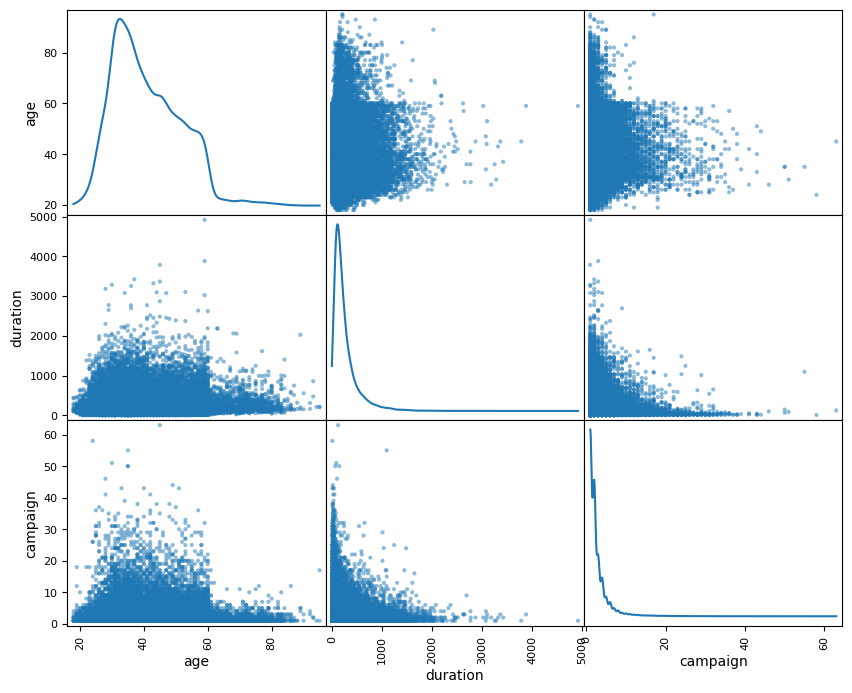

In [29]:
import matplotlib.pyplot as plt
from pyspark.sql.functions import col
import pandas as pd

selected_columns = ["age", "duration", "campaign"]
selected_data = bank_df.select(*selected_columns).toPandas()

# Create the scatter matrix plot using pandas plotting function
scatter_matrix = pd.plotting.scatter_matrix(
    selected_data,
    figsize=(10, 8),
    diagonal="kde"
)

# Show the plot
plt.show()


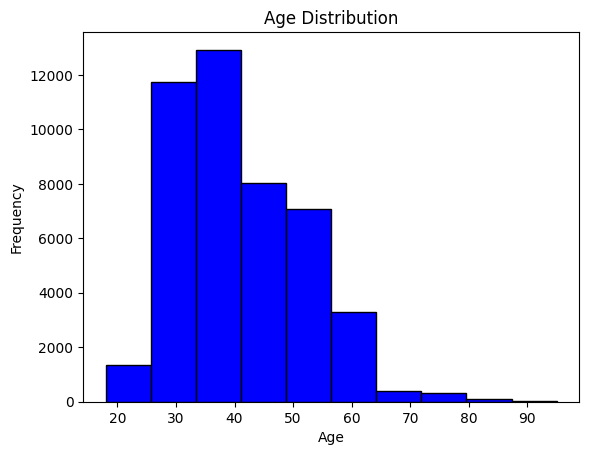

In [30]:
age_list = bank_df.select("age").rdd.flatMap(lambda x: x).collect()
plt.hist(age_list, edgecolor='black', color='blue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

Analyzing the histogram,it becomes clear that a significant portion of our customer base lies between the ages of 25 and 50. This observation corresponds to the demographic group primarily consisting of individuals in their most productive working years.

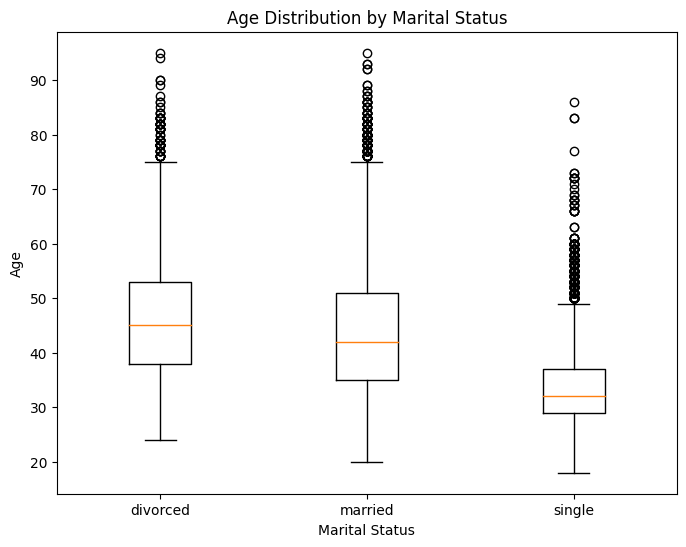

In [31]:
grouped_data = bank_df.groupBy("marital").agg(F.collect_list("age").alias("age_list"))

pandas_grouped_data = grouped_data.toPandas()
plt.figure(figsize=(8, 6))
plt.boxplot(pandas_grouped_data["age_list"], labels=pandas_grouped_data["marital"])
plt.xlabel("Marital Status")
plt.ylabel("Age")
plt.title("Age Distribution by Marital Status")
plt.show()

The above boxplot demonstrates a clear pattern suggesting that unmarried individuals generally have a lower average age in comparison to those who are divorced or currently married. Upon closer inspection of the age distribution within the divorced and married categories, it becomes apparent that there are outliers beyond the age of 70. Similarly, within the unmarried group, there is a noticeable cluster of outliers beyond the age of 50. This observation points to the presence of older individuals within the divorced and married categories, while the unmarried group predominantly consists of younger individuals.

In [33]:
correlation_matrix = bank_df.toPandas().corr()
correlation_matrix

,age,balance,day,duration,campaign,pdays,previous,y
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236
y,0.025155,0.052838,-0.028348,0.394521,-0.073172,0.103621,0.093236,1.000000


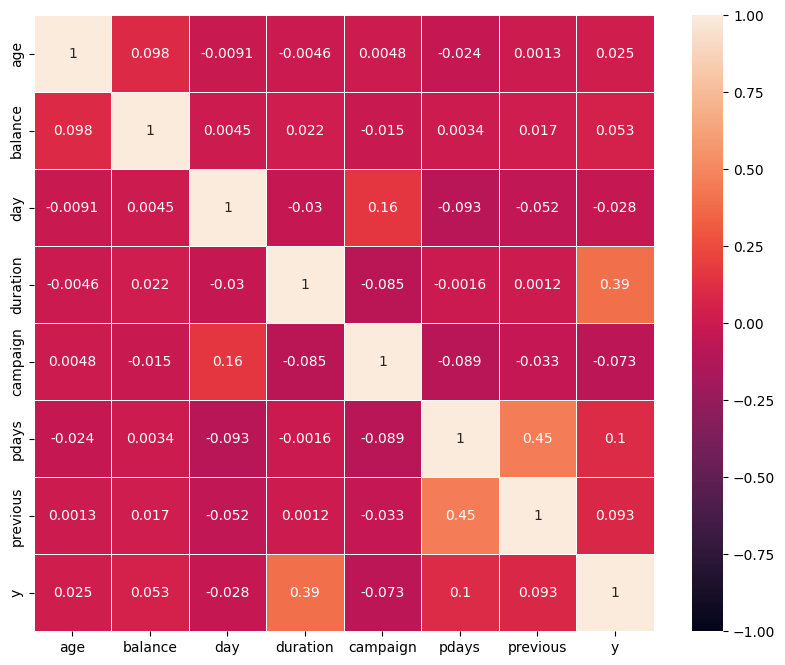

In [35]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True, linewidths=.5)
plt.show()


After analyzing the correlation matrix derived from the dataset, several noteworthy observations emerge. Firstly, a positive correlation exists between the customers' 'age' and their 'balance,' suggesting that older customers tend to possess higher account balances. However, it's important to note that this correlation coefficient (0.097783) indicates a relatively moderate relationship.

Furthermore, the 'duration' of the last contact made during the marketing campaign demonstrates a strong positive correlation (0.394521) with the target variable 'y,' denoting whether the customer subscribed to the product or service. This indicates that longer contact durations positively influence the likelihood of a successful subscription.

Moreover, the 'pdays' variable, representing the number of days since the customer's last contact, exhibits a moderate positive correlation (0.103621) with the target variable. This suggests that a longer duration since the last contact is associated with a slightly higher chance of subscription.

On the other hand, variables such as 'campaign' (number of contacts made during the campaign), 'previous' (number of contacts made before the campaign), and 'balance' (account balance) demonstrate weaker correlations with the target variable. These weaker correlations imply that these variables might have less impact on the subscription outcome.

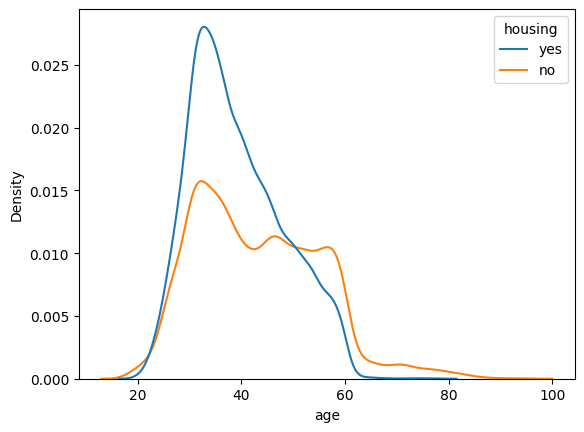

In [36]:
pandas_data = bank_df.select("age", "housing").toPandas()
sns.kdeplot(data=pandas_data, x="age", hue="housing")
plt.show()

The age range when people usually start taking out housing loans is commonly between 20 and 25 years. A significant pattern emerges, with the highest frequency of loan applications observed during the 30s. As individuals move beyond this peak age, the loan rates gradually decrease. Eventually, by the age of 60, the loan rates experience a sharp decline, reaching their minimum level.

<Figure size 1000x1000 with 0 Axes>

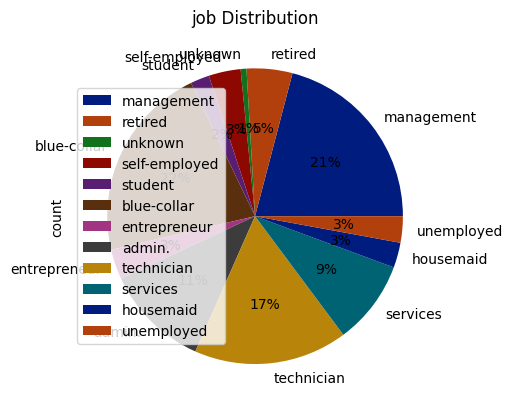

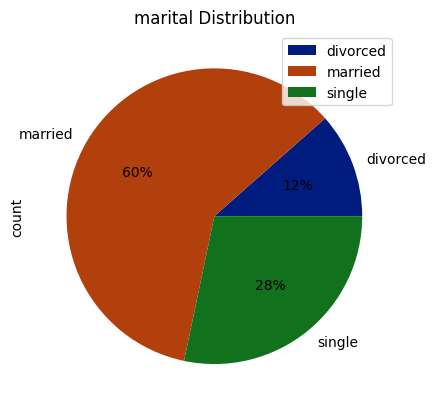

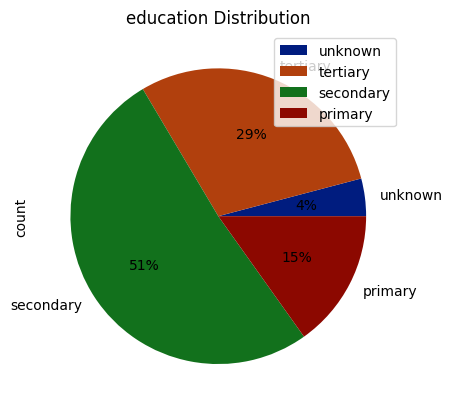

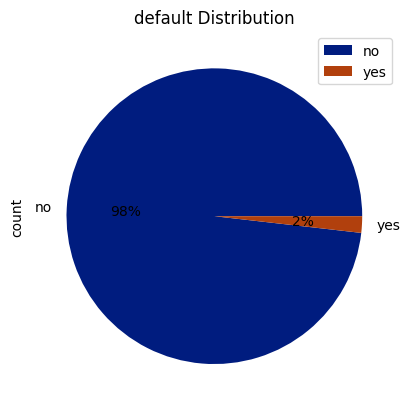

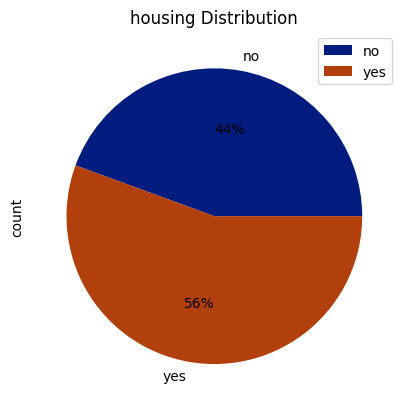

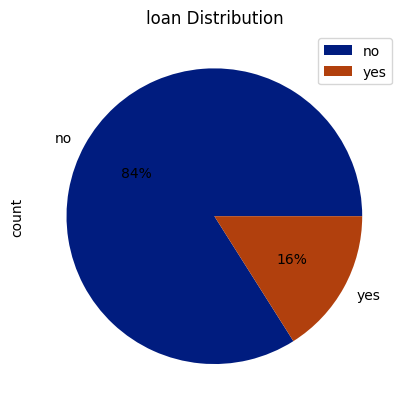

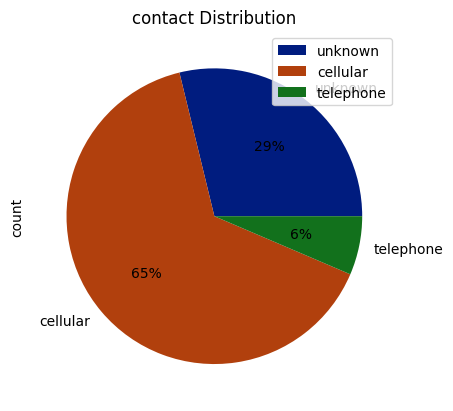

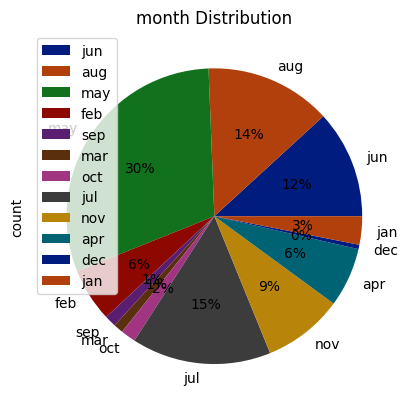

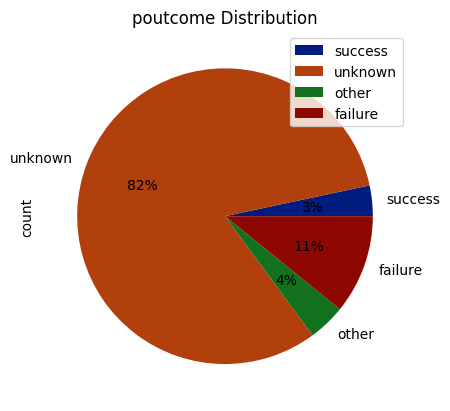

In [39]:
plt.figure(figsize=(10, 10))

for col in [col_name for col_name, data_type in bank_df.dtypes if data_type == 'string']:
    value_counts_df = bank_df.groupBy(col).count()
    palette_color = sns.color_palette('dark')
    value_counts_pd = value_counts_df.toPandas()
    value_counts_pd.plot.pie(y='count', labels=value_counts_pd[col], colors=palette_color, autopct='%.0f%%')
    plt.title(f'{col} Distribution')
    plt.show()

<Axes: >

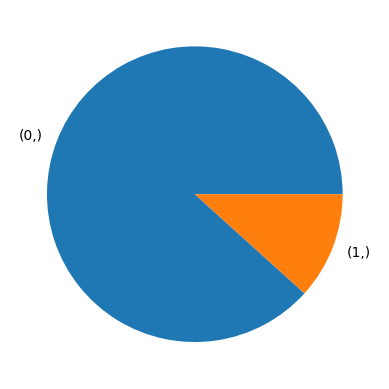

In [42]:
bank_df.select('y').toPandas().value_counts().plot.pie()

<b>Observations</b>

Based on the conducted analysis, it becomes evident that a significant portion of clients in our dataset falls within the age range of 25 to 50 years, representing individuals in their prime working years. Notably, unmarried individuals tend to have a lower average age compared to those who are divorced or currently married, with some outliers beyond the age of 70 observed in the latter groups. Conversely, the unmarried group predominantly consists of younger individuals, with a notable cluster of outliers beyond the age of 50.

The distributions of features exhibit slight skewness, and the correlation matrix reveals some valuable insights. The customers' age shows a positive but weak correlation with their account balance, indicating that older customers tend to have higher balances. Additionally, the duration of the last contact during the marketing campaign demonstrates a strong positive correlation with the target variable, suggesting that longer contact durations increase the likelihood of a successful subscription. Moreover, the variable representing the number of days since the customer was last contacted displays a moderate positive correlation with the target variable, implying that a longer duration since the last contact is associated with a slightly higher chance of subscription. Other variables, such as campaign, previous, and balance, exhibit weak correlations with the target variable, indicating a lesser impact on the subscription outcome.

The distribution of marital status reveals that the highest number of individuals are married, followed by single individuals, while the divorced category has the fewest instances. Similarly, the education distribution shows that a majority of the clients have completed secondary and tertiary education.

Furthermore, analyzing the KDE plots reveals that the age range of 20 to 40 exhibits the highest non-default rate, suggesting a higher likelihood of loan repayment within this demographic. This finding indicates that individuals in this age bracket are more active in securing loans compared to other age groups. Moreover, the peak point for the highest number of loan withdrawals occurs during the 30s, reflecting the age range at which individuals typically start acquiring housing loans. Subsequently, loan rates gradually decline as individuals progress beyond this peak point, reaching their lowest point by the age of 60. The pie charts provide clear visualizations of the distribution of each feature across different categories.


###<b> Feature Engineering

In [43]:
from pyspark.ml.feature import StandardScaler
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.ml.tuning import ParamGridBuilder, TrainValidationSplit
from pyspark.ml.evaluation import BinaryClassificationEvaluator


# Label encoding for categorical columns
cols = ["job", "marital", "education", "housing", "loan", "contact", "month", "default", "poutcome"]
indexers = [StringIndexer(inputCol=col, outputCol=col + "_indexed").fit(bank_df) for col in cols]
pipeline = Pipeline(stages=indexers)
data_encoded = pipeline.fit(bank_df).transform(bank_df)


In [49]:
# Create a vector of features
feature_cols = ["age", "job_indexed", "marital_indexed", "education_indexed", "housing_indexed",
                "loan_indexed", "contact_indexed", "day", "month_indexed", "duration", "campaign",
                "pdays","previous","default_indexed","poutcome_indexed"]
assembler = VectorAssembler(inputCols=feature_cols, outputCol="features")
data_encoded = assembler.transform(data_encoded)

In [54]:
# Splitting the data into train and validation sets
train_data, test_data = data_encoded.randomSplit([0.7, 0.3], seed=42)

In [51]:
train_data.toPandas().columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y', 'job_indexed', 'marital_indexed',
       'education_indexed', 'housing_indexed', 'loan_indexed',
       'contact_indexed', 'month_indexed', 'default_indexed',
       'poutcome_indexed', 'features'],
      dtype='object')

In [53]:
train_data.show(3)

+---+-------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+-----------+---------------+-----------------+---------------+------------+---------------+-------------+---------------+----------------+--------------------+
|age|    job|marital|education|default|balance|housing|loan| contact|day|month|duration|campaign|pdays|previous|poutcome|  y|job_indexed|marital_indexed|education_indexed|housing_indexed|loan_indexed|contact_indexed|month_indexed|default_indexed|poutcome_indexed|            features|
+---+-------+-------+---------+-------+-------+-------+----+--------+---+-----+--------+--------+-----+--------+--------+---+-----------+---------------+-----------------+---------------+------------+---------------+-------------+---------------+----------------+--------------------+
| 18|student| single|  primary|     no|    608|     no|  no|cellular| 12|  aug|     267|       1|   -1|       0| unknown|  1|       10.0|        

<b>observations</b>

All the categorical attributes, such as "job," "marital," "education," "housing," "loan," "contact," "month," "default," and "poutcome," have been encoded using the label encoder technique. While other encoding methods like dummy encoding are available, they were not used due to the potential high dimensionality problem resulting from the numerous classes within each category. As a result, label encoding was deemed more appropriate for this scenario.

To ensure the model's accuracy and performance, the data has been divided into training and testing sets following a 70-30 split, with 70% of the data allocated for training and 30% for testing. It is worth noting that the target variable, "y_train," suggests that the data is imbalanced. Therefore, to address this issue, it might be necessary to consider techniques such as oversampling using SMOTE or undersampling using random undersampler to balance the dataset before model training. These methods aim to enhance the model's ability to handle imbalanced classes and improve its predictive capabilities.

###<b> Modeling

In [55]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.classification import GBTClassifier

rf_classifier = RandomForestClassifier(labelCol="y", featuresCol="features", numTrees=250)
lr_classifier = LogisticRegression(labelCol="y", featuresCol="features")
dt_classifier = DecisionTreeClassifier(labelCol="y", featuresCol="features")
gbt_classifier = GBTClassifier(labelCol="y", featuresCol="features")


In [56]:
model_rf = rf_classifier.fit(train_data)
model_lr = lr_classifier.fit(train_data)
model_dt = dt_classifier.fit(train_data)
model_gbt = gbt_classifier.fit(train_data)


In [58]:
predictions_rf = model_rf.transform(test_data)
predictions_lr = model_lr.transform(test_data)
predictions_dt = model_dt.transform(test_data)
predictions_gbt = model_gbt.transform(test_data)

In [59]:
# Evaluating the model
evaluator = MulticlassClassificationEvaluator(labelCol="y", predictionCol="prediction", metricName="accuracy")
accuracy_rf = evaluator.evaluate(predictions_rf)
accuracy_lr = evaluator.evaluate(predictions_lr)
accuracy_dt = evaluator.evaluate(predictions_dt)
accuracy_gbt = evaluator.evaluate(predictions_gbt)

In [60]:
print("Model Accuracy of Random Forest: ", accuracy_rf)
print("Model Accuracy of Logistic Regression: ", accuracy_lr)
print("Model Accuracy of Decision Tree: ", accuracy_dt)
print("Model Accuracy of Gradient Boosted Trees: ", accuracy_gbt)

Model Accuracy of Random Forest:  0.8973826647883146
Model Accuracy of Logistic Regression:  0.9015348112997702
Model Accuracy of Decision Tree:  0.9027211388744717
Model Accuracy of Gradient Boosted Trees:  0.9056869578112257


In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


In [72]:
# Random forest
true_labels_rf = predictions_rf.select("y").rdd.flatMap(lambda x: x).collect()
predicted_labels_rf = predictions_rf.select("prediction").rdd.flatMap(lambda x: x).collect()

# Logistic Regression
true_labels_lr = predictions_lr.select("y").rdd.flatMap(lambda x: x).collect()
predicted_labels_lr = predictions_lr.select("prediction").rdd.flatMap(lambda x: x).collect()

# Decison Tree
true_labels_dt = predictions_dt.select("y").rdd.flatMap(lambda x: x).collect()
predicted_labels_dt = predictions_dt.select("prediction").rdd.flatMap(lambda x: x).collect()

# GBDT
true_labels_gbt = predictions_gbt.select("y").rdd.flatMap(lambda x: x).collect()
predicted_labels_gbt = predictions_gbt.select("prediction").rdd.flatMap(lambda x: x).collect()

In [74]:
cm_rf = confusion_matrix(true_labels_rf, predicted_labels_rf)
cm_lr = confusion_matrix(true_labels_lr, predicted_labels_lr)
cm_dt = confusion_matrix(true_labels_dt, predicted_labels_dt)
cm_gbt = confusion_matrix(true_labels_gbt, predicted_labels_gbt)

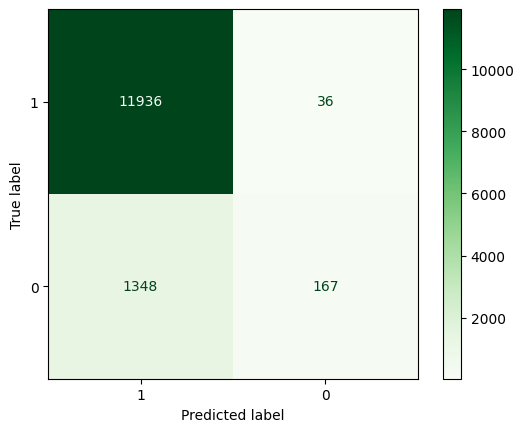

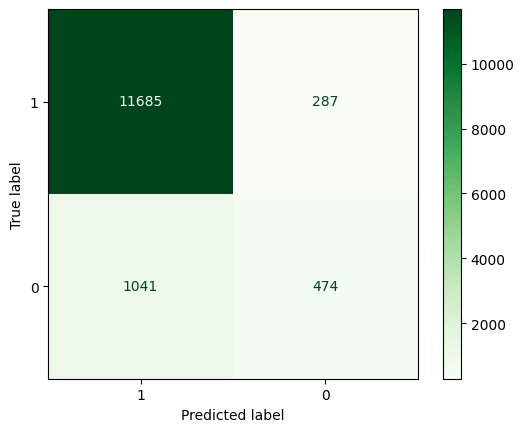

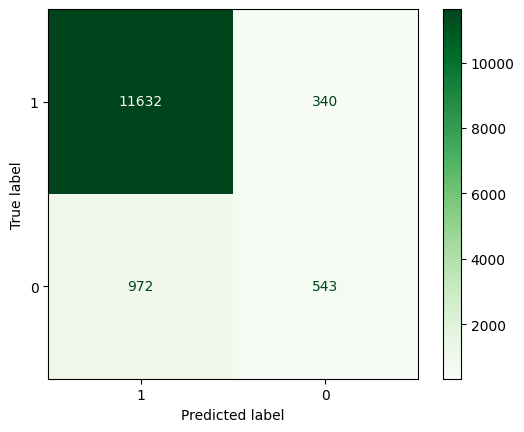

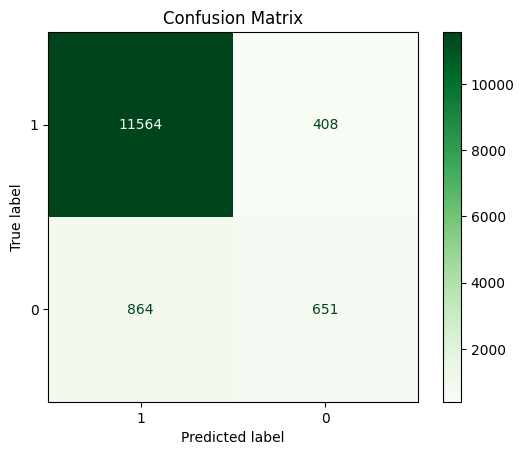

In [76]:
# Create a ConfusionMatrixDisplay object and plot the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=predictions_rf.select("y").distinct().rdd.flatMap(lambda x: x).collect())
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=predictions_lr.select("y").distinct().rdd.flatMap(lambda x: x).collect())
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=predictions_dt.select("y").distinct().rdd.flatMap(lambda x: x).collect())
disp_gbt = ConfusionMatrixDisplay(confusion_matrix=cm_gbt, display_labels=predictions_gbt.select("y").distinct().rdd.flatMap(lambda x: x).collect())

disp_rf.plot(cmap=plt.cm.Greens, values_format=".0f")
disp_lr.plot(cmap=plt.cm.Greens, values_format=".0f")
disp_dt.plot(cmap=plt.cm.Greens, values_format=".0f")
disp_gbt.plot(cmap=plt.cm.Greens, values_format=".0f")

plt.title("Confusion Matrix")
plt.show()


In [81]:
report_rf = classification_report(true_labels_rf, predicted_labels_rf)
print("Classification Report for Random Forest:")
print(report_rf)
print("**"*50)

report_lr = classification_report(true_labels_lr, predicted_labels_lr)
print("Classification Report for Logistic Regression:")
print(report_lr)
print("**"*50)

report_dt = classification_report(true_labels_dt, predicted_labels_dt)
print("Classification Report for Decision Tree:")
print(report_dt)
print("**"*50)

report_gbt = classification_report(true_labels_gbt, predicted_labels_gbt)
print("Classification Report for Gradient Boosting Tree:")
print(report_gbt)

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     11972
           1       0.82      0.11      0.19      1515

    accuracy                           0.90     13487
   macro avg       0.86      0.55      0.57     13487
weighted avg       0.89      0.90      0.86     13487

****************************************************************************************************
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11972
           1       0.62      0.31      0.42      1515

    accuracy                           0.90     13487
   macro avg       0.77      0.64      0.68     13487
weighted avg       0.89      0.90      0.89     13487

****************************************************************************************************
Classification Report for Decision Tree:
              p

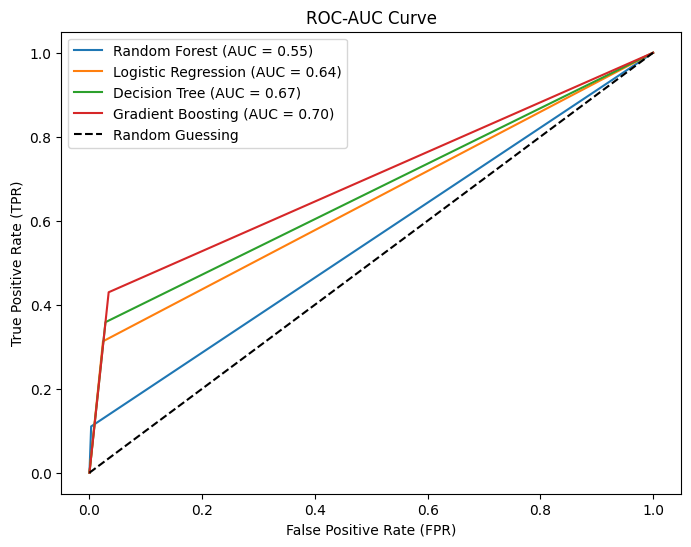

In [82]:
from sklearn.metrics import roc_curve, roc_auc_score

# Function to plot ROC-AUC curve
def plot_roc_curve(true_labels, predicted_labels, model_name):
    fpr, tpr, _ = roc_curve(true_labels, predicted_labels)
    auc = roc_auc_score(true_labels, predicted_labels)

    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {auc:.2f})")

# Plotting ROC-AUC curves for all models
plt.figure(figsize=(8, 6))
plot_roc_curve(true_labels_rf, predicted_labels_rf, "Random Forest")
plot_roc_curve(true_labels_lr, predicted_labels_lr, "Logistic Regression")
plot_roc_curve(true_labels_dt, predicted_labels_dt, "Decision Tree")
plot_roc_curve(true_labels_gbt, predicted_labels_gbt, "Gradient Boosting")

plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()


From the Auc curve, it can be observed that the Gradient Boosting Model has the highest AUC curve with the best curve

<b> Tuning the best model

In [83]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.classification import GBTClassifier

gbt_classifier_tu = GBTClassifier(labelCol="y", featuresCol="features")

param_grid = ParamGridBuilder() \
    .addGrid(gbt_classifier_tu.maxDepth, [2, 6, 8]) \
    .addGrid(gbt_classifier_tu.maxIter, [10, 15, 20]) \
    .build()

In [84]:
evaluator_gbt_tu = MulticlassClassificationEvaluator(labelCol="y", predictionCol="prediction", metricName="accuracy")
cross_val = CrossValidator(estimator=gbt_classifier_tu, estimatorParamMaps=param_grid, evaluator=evaluator_gbt_tu, numFolds=5)
cross_val_model = cross_val.fit(train_data)

predictions_gbt_tu = cross_val_model.transform(test_data)

# Evaluate the tuned GBT model on the scaled test data
accuracy_gbt_tu = evaluator_gbt_tu.evaluate(predictions_gbt_tu)

print("Model accuracy of tuned Gradient Boosting tree: ", accuracy_gbt_tu)


Model accuracy of tuned Gradient Boosting tree:  0.9070215763327649


In [86]:
true_labels_gbt_tu = predictions_gbt_tu.select("y").rdd.flatMap(lambda x: x).collect()
predicted_labels_gbt_tu = predictions_gbt_tu.select("prediction").rdd.flatMap(lambda x: x).collect()

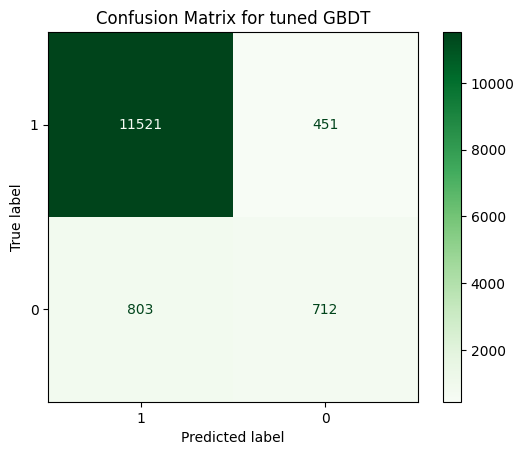

In [87]:
cm_gbt_tu = confusion_matrix(true_labels_gbt_tu, predicted_labels_gbt_tu)
disp_gbt_tu = ConfusionMatrixDisplay(confusion_matrix=cm_gbt_tu, display_labels=predictions_gbt_tu.select("y").distinct().rdd.flatMap(lambda x: x).collect())
disp_gbt_tu.plot(cmap=plt.cm.Greens, values_format=".0f")
plt.title("Confusion Matrix for tuned GBDT")
plt.show()

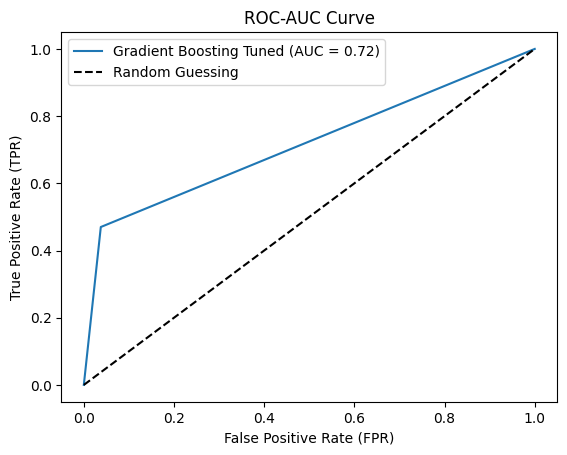

In [90]:
plot_roc_curve(true_labels_gbt_tu, predicted_labels_gbt_tu, "Gradient Boosting Tuned")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-AUC Curve')
plt.legend()
plt.show()

Tuning has also improved the AUC score too

In [89]:
report_gbt_tu = classification_report(true_labels_gbt_tu, predicted_labels_gbt_tu)
print("Classification Report for Tuned Gradient Boosting Tree:")
print(report_gbt_tu)

Classification Report for Tuned Gradient Boosting Tree:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     11972
           1       0.61      0.47      0.53      1515

    accuracy                           0.91     13487
   macro avg       0.77      0.72      0.74     13487
weighted avg       0.90      0.91      0.90     13487



In [92]:
pd.DataFrame({'Model':['Random Forest','Logistic Regression','Decision Tree Classifier', 'GBT', 'Best Model(Tuned GBT)'],
              'Accuracy':[accuracy_rf,accuracy_lr,accuracy_dt, accuracy_gbt, accuracy_gbt_tu],
              'Precision':[0.89, 0.88, 0.89, 0.90,0.90 ],
              'Recall':[0.90, 0.89, 0.90, 0.91, 0.91]})

,Model,Accuracy,Precision,Recall
0,Random Forest,0.897383,0.89,0.90
1,Logistic Regression,0.901535,0.88,0.89
2,Decision Tree Classifier,0.902721,0.89,0.90
3,GBT,0.905687,0.90,0.91
4,Best Model(Tuned GBT),0.907022,0.90,0.91




Observations:

1. Performance Comparison: The models generally demonstrate good performance with accuracy values ranging from 0.897 to 0.907. This suggests that the models are able to make accurate predictions for the binary classification problem, where the target variable indicates whether the client has subscribed to a term deposit.

2. GBT Outperforms: The GBT (Gradient Boosting Trees) model shows the best performance among all the models, with the highest accuracy of 0.905 and precision and recall both at 0.90 and 0.91, respectively. This indicates that the GBT model is well-balanced in making correct positive and negative predictions.

3. Best Model: The table highlights that the best-performing model overall is the "Tuned GBT," which achieves an accuracy of 0.907. It has precision and recall scores of 0.90 and 0.91, respectively. The term "Tuned" indicates that the hyperparameters of the GBT model were fine-tuned to achieve the best possible performance.

4. Precision and Recall: Precision and recall scores indicate the model's ability to correctly classify positive instances and capture true positive instances, respectively. All models demonstrate relatively high precision and recall, showing that they can effectively identify positive instances (clients who subscribe to a term deposit) while minimizing false positives.

5. Consideration for Imbalanced Data: It is important to consider the class imbalance when evaluating the model's performance for this project. Since the target variable is binary, class imbalances can affect the model's performance. However, the reported precision and recall scores show that the models are performing well in handling the imbalanced data.

6. Business Decision: The choice of the best model for deployment depends on the project's specific business requirements. The "Tuned GBT" model with an accuracy of 0.907 may be the preferred choice if a balance between precision and recall is desired.



<b>Moral and Ethical Principles for the Project:</b>

1. Data Privacy and Consent: As the project involves working with client data, one of the key moral and ethical principles is to ensure strict adherence to data privacy and obtain proper consent from individuals whose data is being used. It is crucial to anonymize and secure the data to protect the privacy and confidentiality of the clients. Additionally, obtaining informed consent from the clients, explaining the purpose of data usage, and providing the option to opt-out are essential ethical considerations.

2. Fairness and Bias Mitigation: Given that the project aims to build predictive models for binary classification, it is imperative to ensure fairness in the models' outcomes. Ethical considerations demand the mitigation of any bias in the data or model that may lead to discriminatory decisions or outcomes. The models should be carefully evaluated for potential biases and steps should be taken to address and minimize them. Moreover, constant monitoring and evaluation of the models' fairness should be conducted throughout the project's lifecycle.

3. Transparent and Interpretable Models: Transparency is a crucial ethical principle in machine learning projects. The models should be interpretable, and efforts should be made to provide clear explanations for the predictions. Transparency enables clients to understand how their data is being used and ensures that the decisions made by the models are understandable and accountable. Interpretability also helps in identifying and rectifying any biases or erroneous predictions.

4. Responsible Use of Models: The project's developers and stakeholders should be committed to using the predictive models responsibly and ethically. The models should be deployed for their intended purpose and not misused for any harmful or unethical actions. It is essential to consider the potential impact of model predictions on clients and society and use the models responsibly to enhance client experience and make informed decisions, rather than causing harm or perpetuating discrimination.

5. Continuous Monitoring and Improvement: Ethical considerations extend beyond the development phase. Continuous monitoring and improvement of the models are essential to ensure they remain fair, accurate, and unbiased over time. Regular audits and assessments should be conducted to identify and address any emerging ethical concerns. Transparency in model updates and the willingness to address issues openly are vital to maintain trust and accountability.

